In [3]:
# Import Essential Libraries
import random

import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from ultralytics import YOLO

sns.set(style='darkgrid')
import warnings

warnings.filterwarnings('ignore')

In [4]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [5]:
import os

print(os.sys.path)

['/Library/Frameworks/Python.framework/Versions/3.13/lib/python313.zip', '/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13', '/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/lib-dynload', '', '/Users/jakubkubicki/Library/Python/3.13/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages']


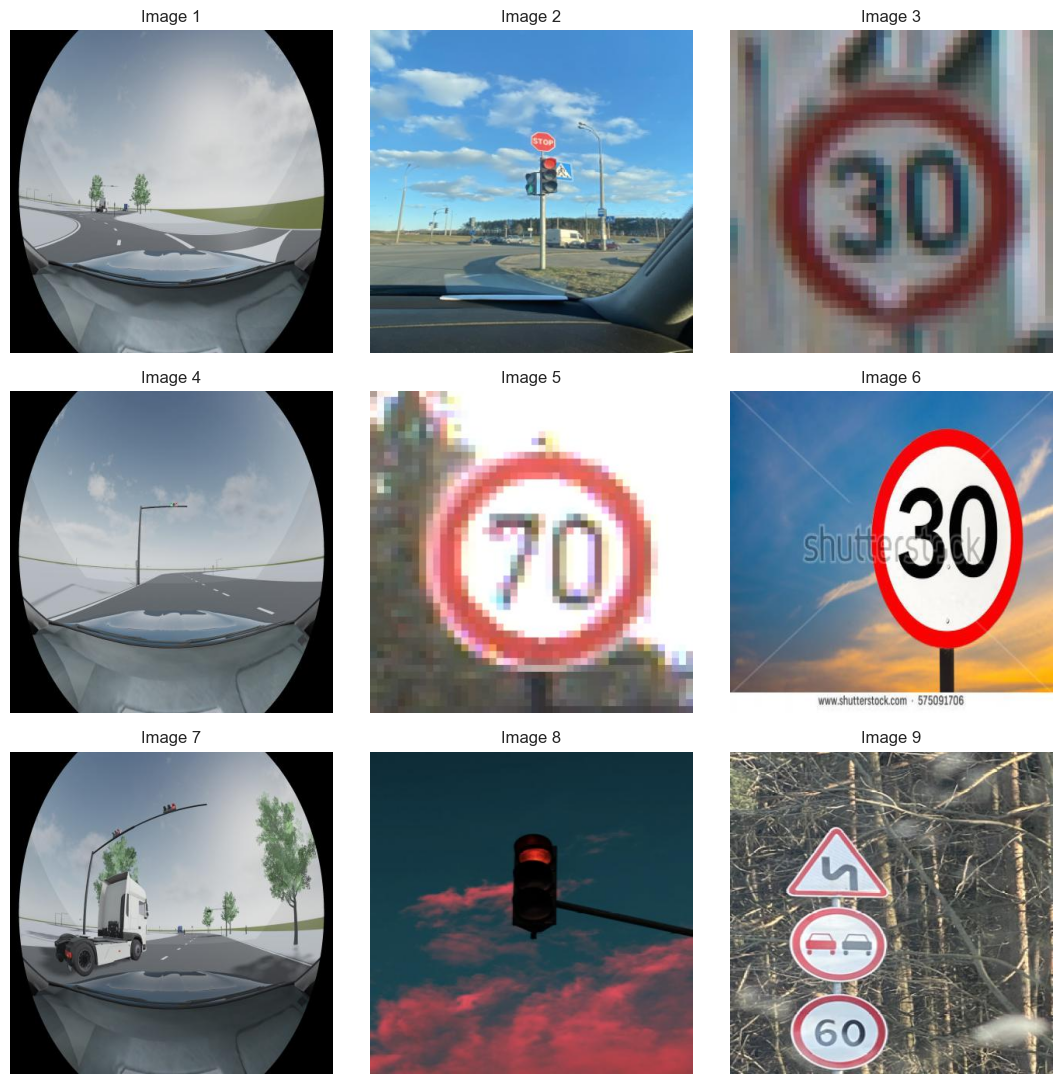

In [6]:
Image_dir = './car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i + 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
# Get the size of the image
image = cv2.imread("./car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 /Users/jakubkubicki/Desktop/studies_repos/CI-YOLO_Atack/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 47.6ms
Speed: 2.3ms preprocess, 47.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


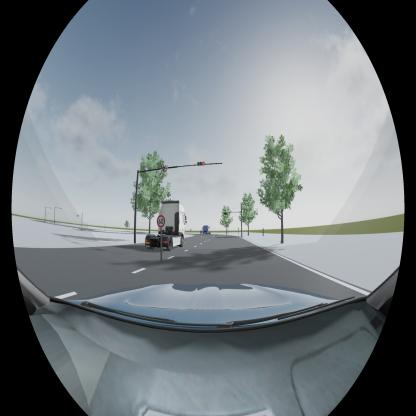

In [8]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "./car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source=image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [9]:
!pip install --upgrade ultralytics ray

In [10]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="./car/data.yaml", epochs=30, batch=10, optimizer='auto', device='mps')

Ultralytics 8.3.225 🚀 Python-3.13.0 torch-2.9.0 MPS (Apple M1 Max)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=10, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./car/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile

Python(76021,0x1f2880800) malloc: Failed to allocate segment from range group - out of space


       2/30      3.33G     0.7787      2.577      1.108         19        640: 100% ━━━━━━━━━━━━ 353/353 1.5it/s 4:01<0.7s
WARNING ⚠️ NMS time limit 3.000s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 2% ──────────── 1/41 0.1it/s 5.4s<11:59WARNING ⚠️ NMS time limit 3.000s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 5% ╸─────────── 2/41 0.1it/s 10.4s<6:32WARNING ⚠️ NMS time limit 3.000s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 7% ╸─────────── 3/41 0.1it/s 14.6s<4:30WARNING ⚠️ NMS time limit 3.000s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 10% ━─────────── 4/41 0.2it/s 19.2s<3:46WARNING ⚠️ NMS time limit 3.000s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 12% ━─────────── 5/41 0.2it/s 24.3s<3:28WARNING ⚠️ NMS time 

Python(76021,0x1f2880800) malloc: Failed to allocate segment from range group - out of space


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 41/41 0.4it/s 1:380.9sss
                   all        801        944      0.386      0.606      0.461      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       4/30      3.31G     0.7403      1.921      1.074         27        640: 100% ━━━━━━━━━━━━ 353/353 1.2it/s 4:58<0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 41/41 0.6it/s 1:050.7sss
                   all        801        944      0.501      0.605      0.589      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       5/30       3.3G     0.7235      1.653      1.066         24        640: 100% ━━━━━━━━━━━━ 353/353 1.1it/s 5:26<0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 37% ━━━━──────── 15/41 0.9it/s 26.7s<28.5sWARNING ⚠️ NMS time 